import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from plotly.offline import iplot 
from dmba import regressionSummary
import csv
from datetime import datetime
from datetime import date
from statsmodels.tsa import tsatools
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

#  Research Question 1: 

Which features have the most important weight on the housing prices (Regression model）

In [1091]:
df=pd.read_csv('redfinOutput.csv')
df

,Unnamed: 0,Address,Sold,Sold Date,Bed,Bath,Size,Lot Size,HOA,Year Build,Type
0,1,"62 Shaniko Cmn,Fremont, CA 94539","$800,000","OCT 1, 2021",3,2.0,"1,150",0,$310,1987,Condo/Co-op
1,2,"45552 Cheyenne Pl,Fremont, CA 94539","$1,880,000","OCT 1, 2021",4,2.0,"1,531","6,300 Sq. Ft.",0,1969,Single Family Residential
2,3,"1201 Valdez Way,FREMONT, CA 94539","$1,800,000","OCT 1, 2021",3,2.0,"1,956","6,600 Sq. Ft.",0,1971,Single Family Residential
3,4,"39762 Blacow Rd,Fremont, CA 94538","$1,150,000","OCT 1, 2021",3,2.0,"1,585","6,400 Sq. Ft.",0,1961,Single Family Residential
4,5,"4405 Calypso Ter,Fremont, CA 94555","$1,530,000","OCT 1, 2021",4,2.5,"1,811","5,202 Sq. Ft.",$50,1992,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...
345,346,"WARM SPRINGS BLVD,FREMONT, CA 94538","$910,384","AUG 20, 2021",2,2.0,"1,265",0,0,2020,Condo/Co-op
346,347,"MOWRY AVE,FREMONT, CA 94538","$1,498,537","AUG 2, 2021",0,0.0,0,"4,519 Sq. Ft.",0,—,Single Family Residential
347,348,"MOWRY AVE,FREMONT, CA 94538","$1,510,364","JUL 30, 2021",0,0.0,0,"5,210 Sq. Ft.",0,—,Single Family Residential
348,349,"WARM SPRINGS BLVD,FREMONT, CA 94538","$2,401,874","AUG 13, 2021",0,0.0,0,0,0,—,Single Family Residential


In [1092]:
d=df['Sold'].str.lstrip('$')
sold=[]
for string in d:
    newstring = ''.join([i for i in string if i.isdigit()])
    sold.append(int(newstring))
df['sold']=pd.DataFrame(sold)

In [1093]:
df = df.drop(df[df.Bed == 0].index)

In [1094]:
df = df.drop(df[df.Bath == 0].index)

In [1095]:
year_build=[]
for x in df['Year Build']:
    if len(x)<4:
        year_build.append(0)
    else:
        year_build.append(x)

In [1096]:
df['year_build']=pd.DataFrame(year_build)

In [1097]:
df = df.drop(df[df.year_build == 0].index)
df

,Unnamed: 0,Address,Sold,Sold Date,Bed,Bath,Size,Lot Size,HOA,Year Build,Type,sold,year_build
0,1,"62 Shaniko Cmn,Fremont, CA 94539","$800,000","OCT 1, 2021",3,2.0,"1,150",0,$310,1987,Condo/Co-op,800000,1987
1,2,"45552 Cheyenne Pl,Fremont, CA 94539","$1,880,000","OCT 1, 2021",4,2.0,"1,531","6,300 Sq. Ft.",0,1969,Single Family Residential,1880000,1969
2,3,"1201 Valdez Way,FREMONT, CA 94539","$1,800,000","OCT 1, 2021",3,2.0,"1,956","6,600 Sq. Ft.",0,1971,Single Family Residential,1800000,1971
3,4,"39762 Blacow Rd,Fremont, CA 94538","$1,150,000","OCT 1, 2021",3,2.0,"1,585","6,400 Sq. Ft.",0,1961,Single Family Residential,1150000,1961
4,5,"4405 Calypso Ter,Fremont, CA 94555","$1,530,000","OCT 1, 2021",4,2.5,"1,811","5,202 Sq. Ft.",$50,1992,Single Family Residential,1530000,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,342,"48535 Spokane Rd,Fremont, CA 94539","$1,910,336","JUL 19, 2021",4,2.0,"2,122",0,0,1977,Single Family Residential,1910336,2008
342,343,"103 Boston Fern Cmn Unit U247,Fremont, CA 94539","$975,465","AUG 12, 2021",2,2.0,"1,382",0,0,2008,Condo/Co-op,975465,2015
343,344,"2881 Predio Ter,Fremont, CA 94539","$1,367,620","JUL 19, 2021",4,4.0,"2,108",0,0,2015,Condo/Co-op,1367620,2019
344,345,"WARM SPRINGS BLVD,FREMONT, CA 94538","$1,063,074","AUG 24, 2021",2,2.0,"1,265",0,0,2019,Condo/Co-op,1063074,2020


In [1098]:
df=df.dropna()

In [1099]:
df['year_build']=df['year_build'].astype(int)

<ipython-input-1099-0390e994e55d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_build']=df['year_build'].astype(int)


In [1100]:
s=2021-df['year_build']

In [1101]:
s

0      34
1      52
2      50
3      60
4      29
       ..
340    44
341    13
342     6
343     2
344     1
Name: year_build, Length: 324, dtype: int32

In [1102]:
df['year_since_built']=pd.DataFrame(s)

<ipython-input-1102-be1cf70dc0ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_since_built']=pd.DataFrame(s)


In [1103]:
size=[]
for string in df['Size']:
    newstring = ''.join([i for i in string if i.isdigit()])
    size.append(int(newstring))

In [1104]:
df['size']=pd.DataFrame(size)
df

<ipython-input-1104-7ac6cc289197>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size']=pd.DataFrame(size)


,Unnamed: 0,Address,Sold,Sold Date,Bed,Bath,Size,Lot Size,HOA,Year Build,Type,sold,year_build,year_since_built,size
0,1,"62 Shaniko Cmn,Fremont, CA 94539","$800,000","OCT 1, 2021",3,2.0,"1,150",0,$310,1987,Condo/Co-op,800000,1987,34,1150.0
1,2,"45552 Cheyenne Pl,Fremont, CA 94539","$1,880,000","OCT 1, 2021",4,2.0,"1,531","6,300 Sq. Ft.",0,1969,Single Family Residential,1880000,1969,52,1531.0
2,3,"1201 Valdez Way,FREMONT, CA 94539","$1,800,000","OCT 1, 2021",3,2.0,"1,956","6,600 Sq. Ft.",0,1971,Single Family Residential,1800000,1971,50,1956.0
3,4,"39762 Blacow Rd,Fremont, CA 94538","$1,150,000","OCT 1, 2021",3,2.0,"1,585","6,400 Sq. Ft.",0,1961,Single Family Residential,1150000,1961,60,1585.0
4,5,"4405 Calypso Ter,Fremont, CA 94555","$1,530,000","OCT 1, 2021",4,2.5,"1,811","5,202 Sq. Ft.",$50,1992,Single Family Residential,1530000,1992,29,1811.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,341,"4991 Conway Ter #53,Fremont, CA 94555","$1,144,571","SEP 7, 2021",3,3.0,"1,309",0,0,1988,Condo/Co-op,1144571,1977,44,NaN
341,342,"48535 Spokane Rd,Fremont, CA 94539","$1,910,336","JUL 19, 2021",4,2.0,"2,122",0,0,1977,Single Family Residential,1910336,2008,13,NaN
342,343,"103 Boston Fern Cmn Unit U247,Fremont, CA 94539","$975,465","AUG 12, 2021",2,2.0,"1,382",0,0,2008,Condo/Co-op,975465,2015,6,NaN
343,344,"2881 Predio Ter,Fremont, CA 94539","$1,367,620","JUL 19, 2021",4,4.0,"2,108",0,0,2015,Condo/Co-op,1367620,2019,2,NaN


In [1105]:
df=df.dropna()

In [1106]:
df=df[['Bed','Bath','size','year_since_built','sold']]

In [1107]:
df['sold']=df['sold']/1000000

In [1108]:
df

,Bed,Bath,size,year_since_built,sold
0,3,2.0,1150.0,34,0.800
1,4,2.0,1531.0,52,1.880
2,3,2.0,1956.0,50,1.800
3,3,2.0,1585.0,60,1.150
4,4,2.5,1811.0,29,1.530
...,...,...,...,...,...
319,3,3.0,1309.0,61,1.525
320,4,3.5,2122.0,5,1.800
321,3,3.0,1382.0,4,0.935
322,3,2.0,2108.0,63,1.220


In [1109]:
x=df.iloc[:,:-1]
print(x.describe())
y=df['sold']
x_train,x_test,y_train,y_test=train_test_split(x,y)

transfer=StandardScaler()
x_train=transfer.fit_transform(x_train)
x_test=transfer.fit_transform(x_test)

estimator=LinearRegression()
estimator.fit(x_train,y_train)
print(estimator.coef_)
y_predict=estimator.predict(x_test)
score=estimator.score(x_test,y_test)
print(score)
estimator.intercept_

              Bed        Bath         size  year_since_built
count  304.000000  304.000000   304.000000        304.000000
mean     3.197368    2.296053  1631.529605         41.480263
std      0.912252    0.749819   695.720814         18.396430
min      1.000000    1.000000   593.000000          1.000000
25%      3.000000    2.000000  1228.000000         32.000000
50%      3.000000    2.000000  1503.000000         43.000000
75%      4.000000    2.500000  1819.500000         58.000000
max      6.000000    5.500000  6787.000000         80.000000
[0.26526805 0.24431468 0.04862064 0.07432199]
0.6856747373337135


1.3716029429824566

<BarContainer object of 4 artists>

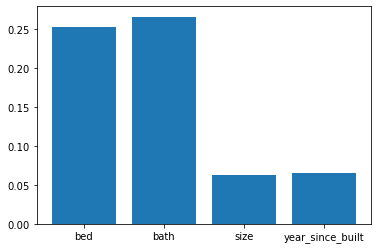

In [1110]:
score=[0.253,0.266,0.063,0.066]
import matplotlib.pyplot as plt
plt.bar(x=['bed','bath','size','year_since_built'],height=score)

# Analysis:

# Research Question 2:

Which type of houses was the most  popular  in Fremont in the past three years?

In [4]:
file=pd.read_csv('Fremont 3 years.csv',parse_dates=True)
file['Type'].value_counts()

Single Family Residential    225
Condo/Co-op                   84
Townhouse                     40
Multi-Family (2-4 Unit)        1
Name: Type, dtype: int64

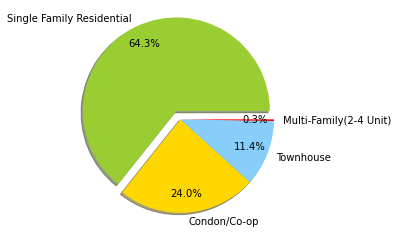

In [5]:
lables='Single Family Residential','Condon/Co-op','Townhouse','Multi-Family(2-4 Unit)'
colors=['yellowgreen', 'gold', 'lightskyblue','red']
sizes = [225, 84, 40, 1]
explode = (0.1, 0, 0, 0)
fig1, ax1 = plt.subplots() 
ax1.pie(sizes, explode=explode, labels=lables,colors=colors,autopct='%.1f%%',pctdistance = 0.8,
        shadow=True, startangle=0,frame = False)
ax1.axis('equal')
plt.show()

# Analysis:

The single family house was the most popular type of homes in Fremont,CA in the past 3 years.

# Research Question 3:

Using time series -autoARIMA  module to predict the number of houses that will be sold in the next 3 months.

In [6]:
# Convert the date information to a datetime object as monthly data.
file['Sold Date'].value_counts()
file['Sold Date']=pd.to_datetime(file['Sold Date'])

file['year_of_sold'] = file['Sold Date'].map(lambda x: x.strftime('%Y'))
file['YM_of_sold'] = file['Sold Date'].map(lambda x: x.strftime('%Y-%m'))
df_new=file.groupby('YM_of_sold').size().to_frame(name = 'counts')
df_new

,counts
YM_of_sold,
2018-10,17
2018-11,7
2018-12,10
2019-01,9
2019-02,9
2019-03,13
2019-04,13
2019-05,18
2019-06,21


In [7]:
# Convert data frame column to time series (name is used to label the data).
sales_ts = pd.Series(df_new.counts.values, 
                  index=df_new.index, name='counts')
# Define the time series frequency.
sales_ts.index = pd.DatetimeIndex(sales_ts.index,freq='MS')
# Show/print first 5 records of the time series dataset.
print(sales_ts.head())

YM_of_sold
2018-10-01    17
2018-11-01     7
2018-12-01    10
2019-01-01     9
2019-02-01     9
Freq: MS, Name: counts, dtype: int64


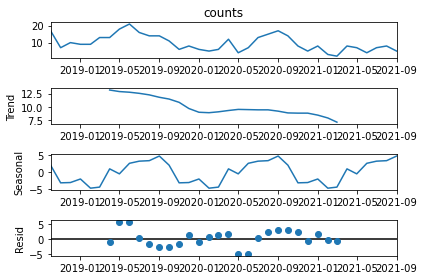

In [8]:
# Use seasonal_decompose to develop time series components.
sales_stl = seasonal_decompose(sales_ts, model='additive',period=12)

# Plot time series components.
sales_stl.plot()
plt.show()

In [9]:
# Define the numbers of months in the training and validation sets,nTrain and nValid, respectively.
nValid = 10
nTrain = len(sales_ts) - nValid
nTrain

# Partition the training data set and show (print) it. 
train_ts = sales_ts[:nTrain]
print('Training Data Set')
print(train_ts)

# Partition the validation data set and show (print) it. 
valid_ts = sales_ts[nTrain:]
print('')
print('Validation Data Set')
print(valid_ts.head())
print(valid_ts.tail())


Training Data Set
YM_of_sold
2018-10-01    17
2018-11-01     7
2018-12-01    10
2019-01-01     9
2019-02-01     9
2019-03-01    13
2019-04-01    13
2019-05-01    18
2019-06-01    21
2019-07-01    16
2019-08-01    14
2019-09-01    14
2019-10-01    11
2019-11-01     6
2019-12-01     8
2020-01-01     6
2020-02-01     5
2020-03-01     6
2020-04-01    12
2020-05-01     4
2020-06-01     7
2020-07-01    13
2020-08-01    15
2020-09-01    17
2020-10-01    14
2020-11-01     8
Freq: MS, Name: counts, dtype: int64

Validation Data Set
YM_of_sold
2020-12-01    5
2021-01-01    8
2021-02-01    3
2021-03-01    2
2021-04-01    8
Freq: MS, Name: counts, dtype: int64
YM_of_sold
2021-05-01    7
2021-06-01    4
2021-07-01    7
2021-08-01    8
2021-09-01    5
Freq: MS, Name: counts, dtype: int64


In [10]:
# Use auto_arima() function to fit ARIMA model for training data 
#to identify the optimal values of all ARIMA parameters for 
# trend and seasonality. 
train_auto_arima = pm.auto_arima(train_ts, 
                         start_p=1,  d=2, start_q=2, #Model start.
                         test='adf', #Use adftest to find optimal 'd'.
                         max_p=3, max_q=3, #Maximum p and q.  
                         m=12,  #Frequency of time series.
                         seasonal=True, #Allow for seasonality.
                         start_P=0, D=1, start_Q=0,#For seasonlity,D=1.
                         trace=True,  
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True) #Stepwise search for min AIC.

# Use summary() to show auto ARIMA optimal parameters. 
print(train_auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,2)(0,1,0)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=86.893, Time=0.01 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=inf, Time=0.13 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(1,1,0)[12]             : AIC=88.892, Time=0.12 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=88.893, Time=0.03 sec
 ARIMA(0,2,0)(1,1,1)[12]             : AIC=90.892, Time=0.09 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=86.619, Time=0.02 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=90.456, Time=0.20 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=86.102, Time=0.02 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(2,2,0)(0,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=89.484, Time=0.28 sec
 ARIMA(3,2,0)(0,1,0)[12]             : AIC=87.773, Time=0.03 sec


In [11]:
# Based on the optimal auto ARIMA parameters, apply SARIMAX()
# function to fit optimal ARIMA model for training data.

train_auto_arima = SARIMAX(train_ts, order=(2, 2, 0), 
              seasonal_order=(0,1,0,12)).fit(disp=0)

# Use summary() to show optimal ARIMA parameters. 
print(train_auto_arima.summary())

# Apply predict() function to make predictions for ts with 
# auto ARIMA model in validation set.  
train_auto_arima_pred = train_auto_arima.predict(start=train_auto_arima.fittedvalues.shape[0], 
                   end=train_auto_arima.fittedvalues.shape[0]+9) 
                         
print(' ')
print('Auto ARIMA Forecast for Validation Period')
print(train_auto_arima_pred)

                                     SARIMAX Results                                      
Dep. Variable:                             counts   No. Observations:                   26
Model:             SARIMAX(2, 2, 0)x(0, 1, 0, 12)   Log Likelihood                 -40.051
Date:                            Mon, 04 Oct 2021   AIC                             86.102
Time:                                    23:01:00   BIC                             87.557
Sample:                                10-01-2018   HQIC                            85.564
                                     - 11-01-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6045      0.327     -1.847      0.065      -1.246       0.037
ar.L2         -0.4139      0.325   

In [12]:
# Create a template for graph layout with partitions for data set. 
def Graph_Layout_Partition_Data():
    # Determine coordinates for drawing vertical lines and 
    # horizontal arrows on the chart.    
    one_month = pd.Timedelta('31 days')
    xtrain = (min(train_ts.index), max(train_ts.index) - one_month)
    xvalid = (min(valid_ts.index) + one_month, max(valid_ts.index) - one_month)
    xfuture = (max(valid_ts.index) + one_month, '2022-3')
    xtv = xtrain[1] + 0.5 * (xvalid[0] - xtrain[1])
    xvf = xvalid[1] + 0.5 * (xfuture[0] - xvalid[1])

    ax.axvline(x=xtv, ymin=0, ymax=1, color='black', linewidth=0.5)
    ax.axvline(x=xvf, ymin=0, ymax=1, color='black', linewidth=0.5)

    plt.annotate("", xy=('2020-10', 30), xytext=('2018-10', 30), 
              arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate("", xy=('2021-9', 30), xytext=('2020-12', 30), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate("", xy=('2022-3', 30), xytext=('2021-9', 30), 
             arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))

    # Input text on the arrows.
    ax.text('2019-8', 32, 'Training')
    ax.text('2021-3', 32, 'Validation')
    ax.text('2021-12', 32, 'Future')

    # Create limits and axis labels.
    ax.set_xlim('2018-7', '2022-3')
    ax.set_ylim(-5, 40)
    ax.set_xlabel('Time')
    ax.set_ylabel('sold counts')

<class 'int'>
<class 'int'>


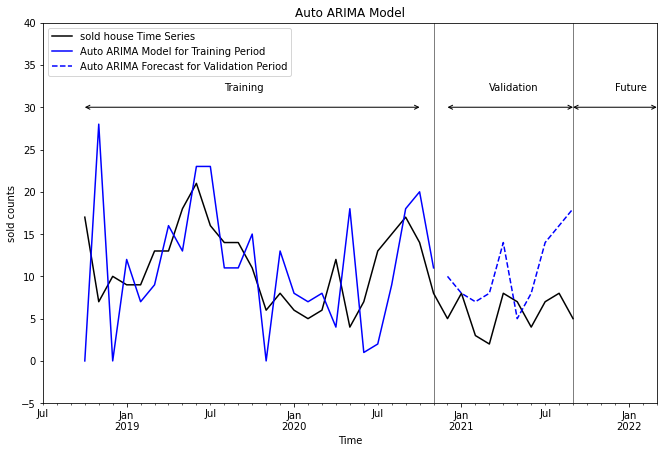

In [13]:
# Plot ts data, auto ARIMA model, and predictions for validation period.
train_auto_arima_pred=train_auto_arima_pred.astype(int)
for i in train_auto_arima_pred: 
    if i< 0: 
        print(type(i))
        train_auto_arima_pred=train_auto_arima_pred.replace(i,0)
        
train_auto_arima.fittedvalues=train_auto_arima.fittedvalues.astype(int)
for i in train_auto_arima.fittedvalues: 
    if i< 0: 
        print(type(i))
        train_auto_arima.fittedvalues=train_auto_arima.fittedvalues.replace(i,0)
# Plot entire data set that combines training and validation.
ax = sales_ts.plot(color='black', linewidth=1.5, figsize=(11,7))

# Plot auto ARIMA model for training and valiation sets.
train_auto_arima.fittedvalues.plot(ax = ax, color="blue", linewidth=1.5)
train_auto_arima_pred.plot(ax = ax, color="blue", style='--', linewidth=1.5)

# Use template of graph layout for partitions. 
Graph_Layout_Partition_Data()

# Create graph legend and title.
ax.legend(['sold house Time Series', 'Auto ARIMA Model for Training Period', 
           'Auto ARIMA Forecast for Validation Period'])
plt.title('Auto ARIMA Model')

plt.show()


In [14]:
# Use auto_arima() function to fit ARIMA model for training data
# to identify the optimal values of all ARIMA parameters for 
# trend and seasonality. 
auto_arima_sales = pm.auto_arima(sales_ts, 
                         start_p=1,  d=2, start_q=1, #Model start.
                         test='adf', #Use adftest to find optimal 'd'.
                         max_p=3, max_q=3, #Maximum p and q.  
                         m=12,  #Frequency of time series.
                         seasonal=True, #Allow for seasonality.
                         start_P=0, D=1, start_Q=0,#For seasonlity,D=1.
                         trace=True,  
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True) #Stepwise search for min AIC.

# Use summary() to show auto ARIMA optimal parameters. 
print(auto_arima_sales.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=153.866, Time=0.01 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=150.808, Time=0.03 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=150.255, Time=0.01 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=150.787, Time=0.04 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.26 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=147.477, Time=0.03 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=145.067, Time=0.06 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(2,2,0)(0,1,1)[12]             : AIC=inf, Time=0.12 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=147.958, Time=0.57 sec
 ARIMA(3,2,0)(1,1,0)[12]             : AIC=146.573, Time=0.06 sec
 ARIMA(2,2,1)(1,1,0)[12]             : AIC=inf, Time=0.15

In [15]:
# Based on the optimal auto ARIMA parameters, apply SARIMAX()
# function to fit optimal ARIMA model for training data.

auto_arima_sales = SARIMAX(sales_ts, order=(2, 2, 0), 
              seasonal_order=(1,1,0,12)).fit(disp=0)

# Use summary() to show optimal ARIMA parameters. 
print(auto_arima_sales.summary())

# Apply predict() function to make predictions for ts with 
# auto ARIMA model in validation set.  
auto_arima_sales_pred = auto_arima_sales.predict(\
            start=auto_arima_sales.fittedvalues.shape[0], 
            end=auto_arima_sales.fittedvalues.shape[0] + 3) 
                         
print(' ')
print('Auto ARIMA Forecast for Validation Period')
print(auto_arima_sales_pred)

                                     SARIMAX Results                                      
Dep. Variable:                             counts   No. Observations:                   36
Model:             SARIMAX(2, 2, 0)x(1, 1, 0, 12)   Log Likelihood                 -68.533
Date:                            Mon, 04 Oct 2021   AIC                            145.067
Time:                                    23:01:24   BIC                            149.431
Sample:                                10-01-2018   HQIC                           146.095
                                     - 09-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8010      0.157     -5.103      0.000      -1.109      -0.493
ar.L2         -0.6406      0.160   

In [16]:
#Create a template for graph layout with entire dataset and 12 periods in future. 
def Graph_Layout_Entire_Data():
    # Determine coordinates for drawing vertical lines and horizontal 
    # arrows on the chart.
    one_month = pd.Timedelta('31 days')
    xsold = (min(sales_ts.index), max(sales_ts.index) - one_month)
    xsoldfuture = (max(sales_ts.index) + one_month, '2023')
    xvf = xsold[1] + 0.5 * (xsoldfuture[0] - xsold[1])

    ax.axvline(x=xvf, ymin=0, ymax=1, color='black', linewidth=0.5)

    plt.annotate("", xy=('2021-8', 30), xytext=('2018-10', 30), arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))
    plt.annotate("", xy=('2021-9', 30), xytext=('2022-12', 30), arrowprops=dict(arrowstyle="<->", shrinkA=0, shrinkB=0))

    # Input text on the arrows.
    ax.text('2020', 32, 'Training')
    ax.text('2021-12', 32, 'Future')

    # Create limits and axis labels.
    ax.set_xlim('2018-10', '2022-12')
    ax.set_ylim(-5, 40)
    ax.set_xlabel('Time')
    ax.set_ylabel('sold counts')
    

<class 'int'>
<class 'int'>
<class 'int'>


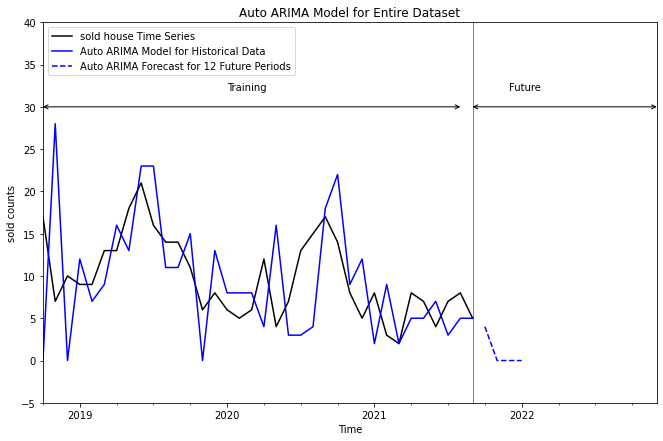

In [17]:
# Plot historical data, auto ARIMA model predictions for historical data and forecast for next 3 months
auto_arima_sales_pred=auto_arima_sales_pred.astype(int)
for i in auto_arima_sales_pred: 
    if i< 0: 
        print(type(i))
        auto_arima_sales_pred=auto_arima_sales_pred.replace(i,0)
auto_arima_sales.fittedvalues=auto_arima_sales.fittedvalues.astype(int)
for i in auto_arima_sales.fittedvalues: 
    if i< 0: 
        print(type(i))
        auto_arima_sales.fittedvalues=auto_arima_sales.fittedvalues.replace(i,0)
# Plot entire data set that combines training and validation.
ax = sales_ts.plot(color='black', linewidth=1.5, figsize=(11,7))

# Plot auto ARIMA model for historical data and 12 future periods.
auto_arima_sales.fittedvalues.plot(ax = ax, 
                    color="blue", linewidth=1.5)
auto_arima_sales_pred.plot(ax = ax, 
                    color="blue", style='--', linewidth=1.5)

# Use template of graph layout for partitions. 
Graph_Layout_Entire_Data()

# Create graph legend and title.
ax.legend(['sold house Time Series', 'Auto ARIMA Model for Historical Data', 
           'Auto ARIMA Forecast for 12 Future Periods'])
plt.title('Auto ARIMA Model for Entire Dataset')

plt.show()


In [18]:
print('Accuracy Measures for Auto ARIMA Model for Entire Dataset')
regressionSummary(sales_ts, auto_arima_sales.fittedvalues)

Accuracy Measures for Auto ARIMA Model for Entire Dataset

Regression statistics

                      Mean Error (ME) : 0.3056
       Root Mean Squared Error (RMSE) : 6.9462
            Mean Absolute Error (MAE) : 5.3056
          Mean Percentage Error (MPE) : -13.6759
Mean Absolute Percentage Error (MAPE) : 65.5318


# Analysis:

The sales trend is going down after 2021/10 to 2022/01,behind this trend, we can guess the reason is that the holiday season is coming and will affecting on the real estate's market.

# Reasearch Question 3:

What is the housing price comparing between Los Angeles,Seattle and San Francisco?

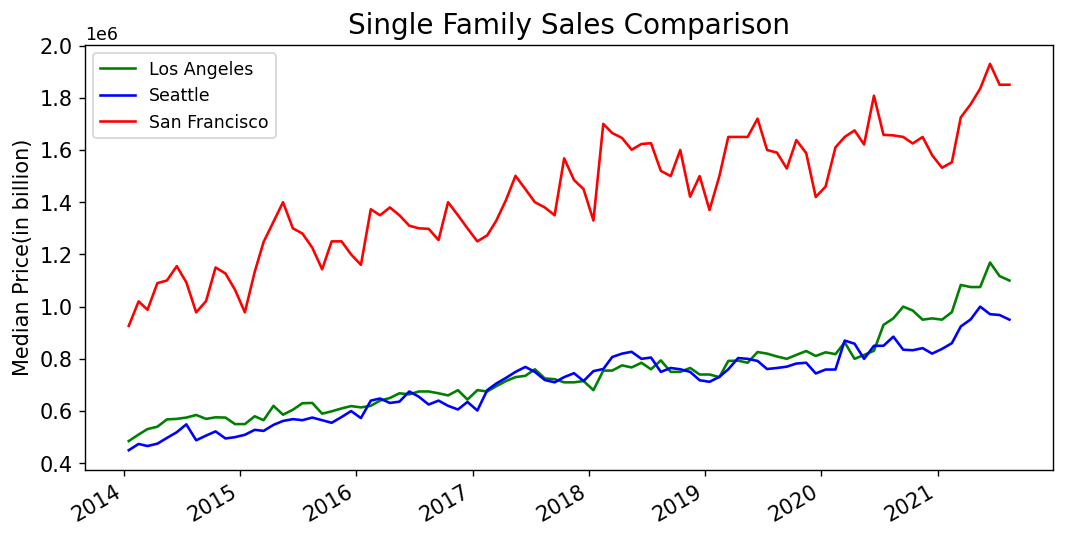

In [2]:
filename='single4.csv'
with open(filename) as f:
    reader=csv.reader(f)
    header_row=next(reader)

    dates,LosAngeles,Seattle,SanFrancisco=[],[],[],[]
    for row in reader:
        current_date=datetime.strptime(row[0],"%Y/%m/%d")
        dates.append(current_date)

        price_LA=int(row[1])
        LosAngeles.append(price_LA)

        price_SEA=int(row[4])
        Seattle.append(price_SEA)
        
        price_SF=int(row[3])
        SanFrancisco.append(price_SF)
        
fig=plt.figure(dpi=125,figsize=(10,5))
plt.plot(dates,LosAngeles,c='green',label='Los Angeles')
plt.plot(dates,Seattle,c='blue',label='Seattle')
plt.plot(dates,SanFrancisco,c='red',label='San Francisco')

plt.title("Single Family Sales Comparison",fontsize=16)
plt.xlabel('',fontsize=18)
fig.autofmt_xdate()
plt.ylabel('Median Price(in billion)',fontsize=12)
plt.tick_params(axis='both',which='major',labelsize=12)
plt.legend()

plt.show()

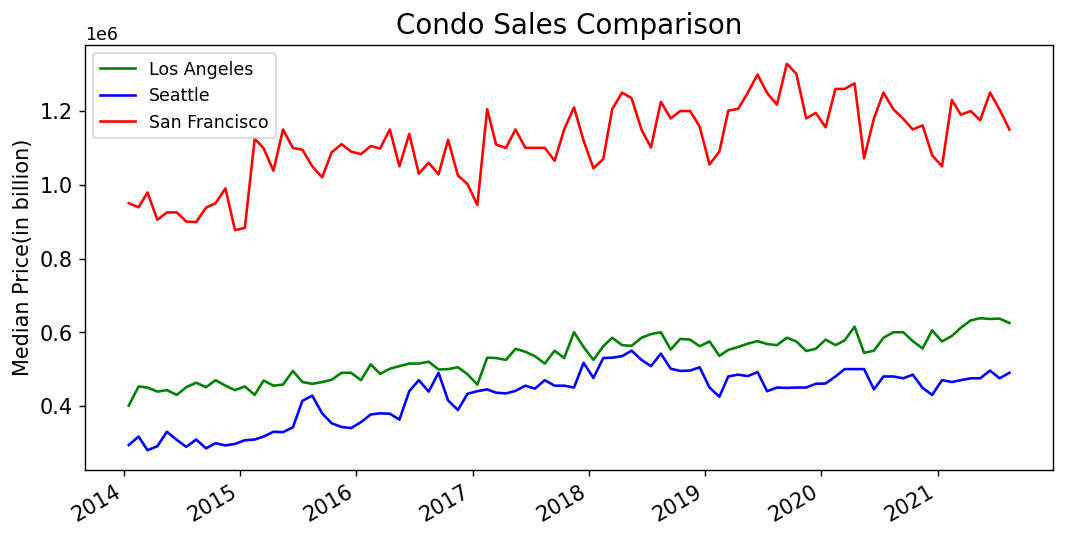

In [4]:
filename='condo4.csv'
with open(filename) as f:
    reader=csv.reader(f)
    header_row=next(reader)

    dates,LosAngeles,Seattle,SanFrancisco=[],[],[],[]
    for row in reader:
        current_date=datetime.strptime(row[0],"%Y/%m/%d")
        dates.append(current_date)

        price_LA=int(row[1])
        LosAngeles.append(price_LA)

        price_SEA=int(row[4])
        Seattle.append(price_SEA)
        
        price_SF=int(row[3])
        SanFrancisco.append(price_SF) 

fig=plt.figure(dpi=125,figsize=(10,5))
plt.plot(dates,LosAngeles,c='green',label='Los Angeles')
plt.plot(dates,Seattle,c='blue',label='Seattle')
plt.plot(dates,SanFrancisco,c='red',label='San Francisco')

plt.title("Condo Sales Comparison",fontsize=16)
plt.xlabel('',fontsize=18)
fig.autofmt_xdate()
plt.ylabel('Median Price(in billion)',fontsize=12)
plt.tick_params(axis='both',which='major',labelsize=12)
plt.legend()

plt.show()

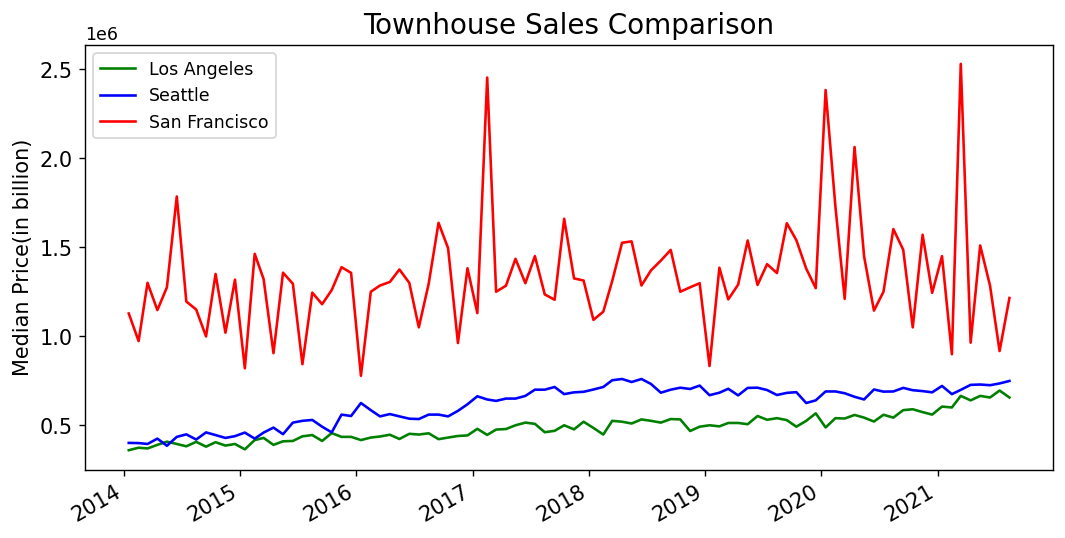

In [5]:
filename='townhouse4.csv'
with open(filename) as f:
    reader=csv.reader(f)
    header_row=next(reader)

    dates,LosAngeles,Seattle,SanFrancisco=[],[],[],[]
    for row in reader:
        current_date=datetime.strptime(row[0],"%Y/%m/%d")
        dates.append(current_date)

        price_LA=int(row[1])
        LosAngeles.append(price_LA)

        price_SEA=int(row[4])
        Seattle.append(price_SEA)
        
        price_SF=int(row[3])
        SanFrancisco.append(price_SF)
        
        

fig=plt.figure(dpi=125,figsize=(10,5))
plt.plot(dates,LosAngeles,c='green',label='Los Angeles')
plt.plot(dates,Seattle,c='blue',label='Seattle')
plt.plot(dates,SanFrancisco,c='red',label='San Francisco')

plt.title("Townhouse Sales Comparison",fontsize=16)
plt.xlabel('',fontsize=18)
fig.autofmt_xdate()
plt.ylabel('Median Price(in billion)',fontsize=12)
plt.tick_params(axis='both',which='major',labelsize=12)
plt.legend()

plt.show()